In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [180]:
data = pd.read_csv('Mobile phone price.csv')

In [181]:
data

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [183]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price ($)'],axis=1)
y = data['Price ($)']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [185]:
train_data = X_train.join(y_train)

In [186]:
train_data

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,Oppo,Reno 5 Pro 5G,128,8,6.55,64+8+2+2,4350,449
35,Realme,C25s,128 GB,4 GB,6.5,13 + 2 + 2,6000,159
74,Apple,iPhone 11,128 GB,4 GB,6.1,12 + 12,3110,599
246,Xiaomi,Poco X3 Pro,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
263,Xiaomi,Redmi 9 Power,64GB,4GB,6.53,48MP + 8MP + 2MP + 2MP,6000,$169
...,...,...,...,...,...,...,...,...
277,Oppo,A12,64GB,4GB,6.22,13MP + 2MP,4230,$139
305,Apple,iPhone 13,128,6,6.1,12+12+12,2815,799
255,Vivo,V20 SE,128GB,8GB,6.44,48MP + 8MP + 2MP,4100,$319
320,Oppo,A94 5G,128,8,6.43,48+8+2+2,4310,399


In [187]:
train_data = train_data.drop(['Model'],axis=1)

In [188]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,Oppo,128,8,6.55,64+8+2+2,4350,449
35,Realme,128 GB,4 GB,6.5,13 + 2 + 2,6000,159
74,Apple,128 GB,4 GB,6.1,12 + 12,3110,599
246,Xiaomi,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
263,Xiaomi,64GB,4GB,6.53,48MP + 8MP + 2MP + 2MP,6000,$169
...,...,...,...,...,...,...,...
277,Oppo,64GB,4GB,6.22,13MP + 2MP,4230,$139
305,Apple,128,6,6.1,12+12+12,2815,799
255,Vivo,128GB,8GB,6.44,48MP + 8MP + 2MP,4100,$319
320,Oppo,128,8,6.43,48+8+2+2,4310,399


In [189]:
from sklearn.preprocessing import OrdinalEncoder

brand_order = [
    'Samsung', 'Realme', 'Xiaomi', 'Vivo', 'Oppo', 'Apple', 'Motorola', 'Nokia',
    'OnePlus', 'LG', 'Blackberry', 'Huawei', 'Asus', 'CAT', 'Google', 'Sony'
]

encoder = OrdinalEncoder(categories=[brand_order])
train_data['Brand'] = encoder.fit_transform(train_data[['Brand']]).astype(int)

In [190]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,4,128,8,6.55,64+8+2+2,4350,449
35,1,128 GB,4 GB,6.5,13 + 2 + 2,6000,159
74,5,128 GB,4 GB,6.1,12 + 12,3110,599
246,2,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
263,2,64GB,4GB,6.53,48MP + 8MP + 2MP + 2MP,6000,$169
...,...,...,...,...,...,...,...
277,4,64GB,4GB,6.22,13MP + 2MP,4230,$139
305,5,128,6,6.1,12+12+12,2815,799
255,3,128GB,8GB,6.44,48MP + 8MP + 2MP,4100,$319
320,4,128,8,6.43,48+8+2+2,4310,399


In [191]:
train_data['Storage '] = train_data['Storage '].astype(str).str.replace('GB', '', regex=False).str.replace(' ', '').str.strip()
train_data['Storage '] = train_data['Storage '].astype(int)

In [192]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,4,128,8,6.55,64+8+2+2,4350,449
35,1,128,4 GB,6.5,13 + 2 + 2,6000,159
74,5,128,4 GB,6.1,12 + 12,3110,599
246,2,128,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
263,2,64,4GB,6.53,48MP + 8MP + 2MP + 2MP,6000,$169
...,...,...,...,...,...,...,...
277,4,64,4GB,6.22,13MP + 2MP,4230,$139
305,5,128,6,6.1,12+12+12,2815,799
255,3,128,8GB,6.44,48MP + 8MP + 2MP,4100,$319
320,4,128,8,6.43,48+8+2+2,4310,399


In [193]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 294 to 324
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   284 non-null    int64 
 1   Storage                 284 non-null    int64 
 2   RAM                     284 non-null    object
 3   Screen Size (inches)    284 non-null    object
 4   Camera (MP)             284 non-null    object
 5   Battery Capacity (mAh)  284 non-null    int64 
 6   Price ($)               284 non-null    object
dtypes: int64(3), object(4)
memory usage: 25.9+ KB


In [194]:
train_data['RAM '] = train_data['RAM '].astype(str).str.replace('GB','',regex=False).str.replace(' ','').str.strip()
train_data['RAM '] = train_data['RAM '].astype(int)

In [195]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 294 to 324
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   284 non-null    int64 
 1   Storage                 284 non-null    int64 
 2   RAM                     284 non-null    int64 
 3   Screen Size (inches)    284 non-null    object
 4   Camera (MP)             284 non-null    object
 5   Battery Capacity (mAh)  284 non-null    int64 
 6   Price ($)               284 non-null    object
dtypes: int64(4), object(3)
memory usage: 25.9+ KB


In [196]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,4,128,8,6.55,64+8+2+2,4350,449
35,1,128,4,6.5,13 + 2 + 2,6000,159
74,5,128,4,6.1,12 + 12,3110,599
246,2,128,6,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
263,2,64,4,6.53,48MP + 8MP + 2MP + 2MP,6000,$169
...,...,...,...,...,...,...,...
277,4,64,4,6.22,13MP + 2MP,4230,$139
305,5,128,6,6.1,12+12+12,2815,799
255,3,128,8,6.44,48MP + 8MP + 2MP,4100,$319
320,4,128,8,6.43,48+8+2+2,4310,399


In [197]:
import pandas as pd

# Contoh kalau kolomnya 'Screen Size'
def eval_screen_size(val):
    try:
        return eval(val) if isinstance(val, str) else val
    except:
        return None  # atau float('nan') biar jadi NaN

train_data['Screen Size (inches)'] = train_data['Screen Size (inches)'].apply(eval_screen_size).astype(float)


<string>:1: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?


In [198]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,4,128,8,6.55,64+8+2+2,4350,449
35,1,128,4,6.50,13 + 2 + 2,6000,159
74,5,128,4,6.10,12 + 12,3110,599
246,2,128,6,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
263,2,64,4,6.53,48MP + 8MP + 2MP + 2MP,6000,$169
...,...,...,...,...,...,...,...
277,4,64,4,6.22,13MP + 2MP,4230,$139
305,5,128,6,6.10,12+12+12,2815,799
255,3,128,8,6.44,48MP + 8MP + 2MP,4100,$319
320,4,128,8,6.43,48+8+2+2,4310,399


In [199]:
import re

def parse_camera(val):
    try:
        if isinstance(val, str):
            # Hilangkan "MP", spasi, dan dolar
            val = val.replace("MP", "").replace("mp", "").replace(" ", "")
            # Pecah berdasarkan "+"
            parts = re.split(r'\+', val)
            # Ubah semuanya jadi float, lalu jumlahkan
            return sum(float(p) for p in parts)
        else:
            return float(val)  # kalau angka biasa
    except:
        return None  # atau float('nan') jika error

# Asumsikan nama kolom: 'Camera (MP)'
train_data['Camera (MP)'] = train_data['Camera (MP)'].apply(parse_camera)


In [200]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,4,128,8,6.55,76.0,4350,449
35,1,128,4,6.50,17.0,6000,159
74,5,128,4,6.10,24.0,3110,599
246,2,128,6,6.67,60.0,5160,$249
263,2,64,4,6.53,60.0,6000,$169
...,...,...,...,...,...,...,...
277,4,64,4,6.22,15.0,4230,$139
305,5,128,6,6.10,36.0,2815,799
255,3,128,8,6.44,58.0,4100,$319
320,4,128,8,6.43,60.0,4310,399


In [201]:
train_data['Price ($)'] = train_data['Price ($)'].astype(str).str.replace('$','', regex=False).str.replace(',','',regex=False).str.strip()

In [202]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,4,128,8,6.55,76.0,4350,449
35,1,128,4,6.50,17.0,6000,159
74,5,128,4,6.10,24.0,3110,599
246,2,128,6,6.67,60.0,5160,249
263,2,64,4,6.53,60.0,6000,169
...,...,...,...,...,...,...,...
277,4,64,4,6.22,15.0,4230,139
305,5,128,6,6.10,36.0,2815,799
255,3,128,8,6.44,58.0,4100,319
320,4,128,8,6.43,60.0,4310,399


In [203]:
train_data['Price ($)'] = train_data['Price ($)'].astype(int)

In [204]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
294,4,128,8,6.55,76.0,4350,449
35,1,128,4,6.50,17.0,6000,159
74,5,128,4,6.10,24.0,3110,599
246,2,128,6,6.67,60.0,5160,249
263,2,64,4,6.53,60.0,6000,169
...,...,...,...,...,...,...,...
277,4,64,4,6.22,15.0,4230,139
305,5,128,6,6.10,36.0,2815,799
255,3,128,8,6.44,58.0,4100,319
320,4,128,8,6.43,60.0,4310,399


In [205]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 294 to 324
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   284 non-null    int64  
 1   Storage                 284 non-null    int64  
 2   RAM                     284 non-null    int64  
 3   Screen Size (inches)    283 non-null    float64
 4   Camera (MP)             279 non-null    float64
 5   Battery Capacity (mAh)  284 non-null    int64  
 6   Price ($)               284 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 25.9 KB


array([[<Axes: title={'center': 'Brand'}>,
        <Axes: title={'center': 'Storage '}>,
        <Axes: title={'center': 'RAM '}>],
       [<Axes: title={'center': 'Screen Size (inches)'}>,
        <Axes: title={'center': 'Camera (MP)'}>,
        <Axes: title={'center': 'Battery Capacity (mAh)'}>],
       [<Axes: title={'center': 'Price ($)'}>, <Axes: >, <Axes: >]],
      dtype=object)

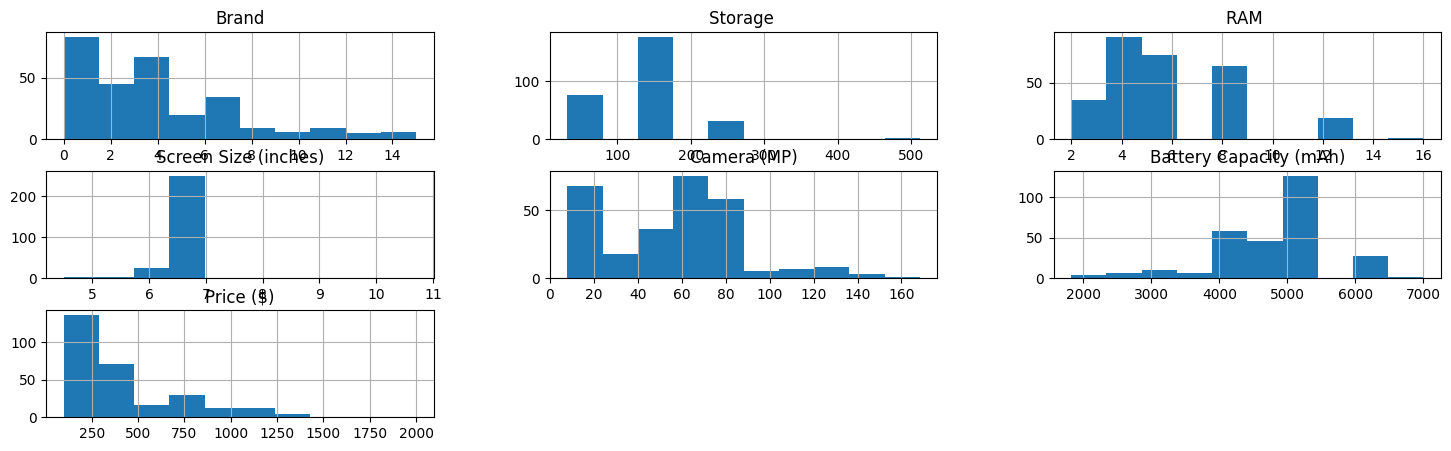

In [206]:
train_data.hist(figsize=(18,5))

<Axes: >

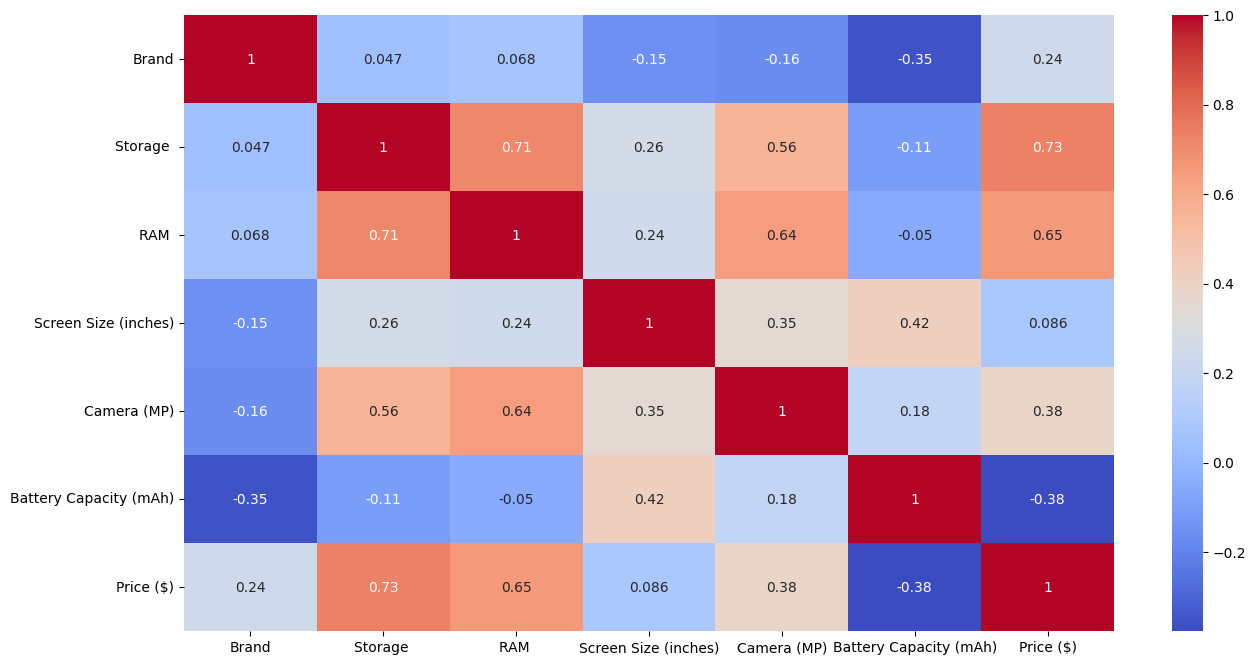

In [207]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [208]:
def build_quality(row):
    score = 0

    if row['Storage '] > 256:
        score += 3
    elif row['Storage '] == 256:
        score += 2
    elif row['Storage '] == 128:
        score += 1

    if row['RAM '] >= 12:
        score += 3
    elif row['RAM '] >= 8:
        score += 2
    elif row['RAM '] >= 6:
        score += 1

    if row['Screen Size (inches)'] > 6.7:
        score += 2
    elif row['Screen Size (inches)'] >= 6.4:
        score += 1

    if row['Camera (MP)'] > 50:
        score += 2
    elif row['Camera (MP)'] >= 20:
        score += 1

    return score


In [209]:
train_data['Build_Quality'] = train_data.apply(build_quality, axis=1)

In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')

X_train, y_train = train_data.drop(['Price ($)'], axis=1), train_data['Price ($)']
X_train = imputer.fit_transform(X_train)
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [211]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import re
import numpy as np

test_data = X_test.join(y_test)

test_data = test_data.drop(['Model'], axis=1)

brand_order = [
    'Samsung', 'Realme', 'Xiaomi', 'Vivo', 'Oppo', 'Apple', 'Motorola', 'Nokia',
    'OnePlus', 'LG', 'Blackberry', 'Huawei', 'Asus', 'CAT', 'Google', 'Sony'
]

encoder = OrdinalEncoder(categories=[brand_order])
test_data['Brand'] = encoder.fit_transform(test_data[['Brand']]).astype(int)

test_data['Storage '] = test_data['Storage '].astype(str).str.replace('GB', '', regex=False).str.replace(' ', '').str.strip()
test_data['Storage '] = test_data['Storage '].astype(int)

test_data['RAM '] = test_data['RAM '].astype(str).str.replace('GB','',regex=False).str.replace(' ','').str.strip()
test_data['RAM '] = test_data['RAM '].astype(int)

def eval_screen_size(val):
    try:
        return eval(val) if isinstance(val, str) else val
    except:
        return None

test_data['Screen Size (inches)'] = test_data['Screen Size (inches)'].apply(eval_screen_size).astype(float)

def parse_camera(val):
    try:
        if isinstance(val, str):
            val = val.replace("MP", "").replace("mp", "").replace(" ", "")
            parts = re.split(r'\+', val)
            return sum(float(p) for p in parts)
        else:
            return float(val)
    except:
        return None

test_data['Camera (MP)'] = test_data['Camera (MP)'].apply(parse_camera)

test_data['Price ($)'] = test_data['Price ($)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
test_data['Price ($)'] = test_data['Price ($)'].astype(int)
test_data['Build_Quality'] = test_data.apply(build_quality, axis=1)

In [212]:
X_test, y_test = test_data.drop(['Price ($)'], axis=1), test_data['Price ($)']

In [213]:
test_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Build_Quality
102,0,128,8,6.70,24.0,3300,999,5
142,4,128,6,6.43,52.0,5000,299,5
354,8,128,8,6.44,63.0,4115,449,6
190,3,128,8,6.44,74.0,4000,399,6
273,1,32,2,6.50,15.0,5000,99,1
...,...,...,...,...,...,...,...,...
72,4,128,8,6.43,60.0,4310,329,6
125,0,128,6,6.40,60.0,6000,229,5
170,6,128,5,6.80,61.0,5000,399,5
377,0,128,6,6.50,32.0,4500,699,4


In [214]:
X_test = imputer.fit_transform(X_test)
X_test_s = scaler.fit_transform(X_test)

In [215]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 294 to 324
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   278 non-null    int64  
 1   Storage                 278 non-null    int64  
 2   RAM                     278 non-null    int64  
 3   Screen Size (inches)    278 non-null    float64
 4   Camera (MP)             278 non-null    float64
 5   Battery Capacity (mAh)  278 non-null    int64  
 6   Price ($)               278 non-null    int64  
 7   Build_Quality           278 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 19.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 102 to 231
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   121 non-null    int64  
 1   Storage                 121 non-null    int64  
 2   

In [216]:
reg.score(X_test_s, y_test)

0.6711077972706636

In [217]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

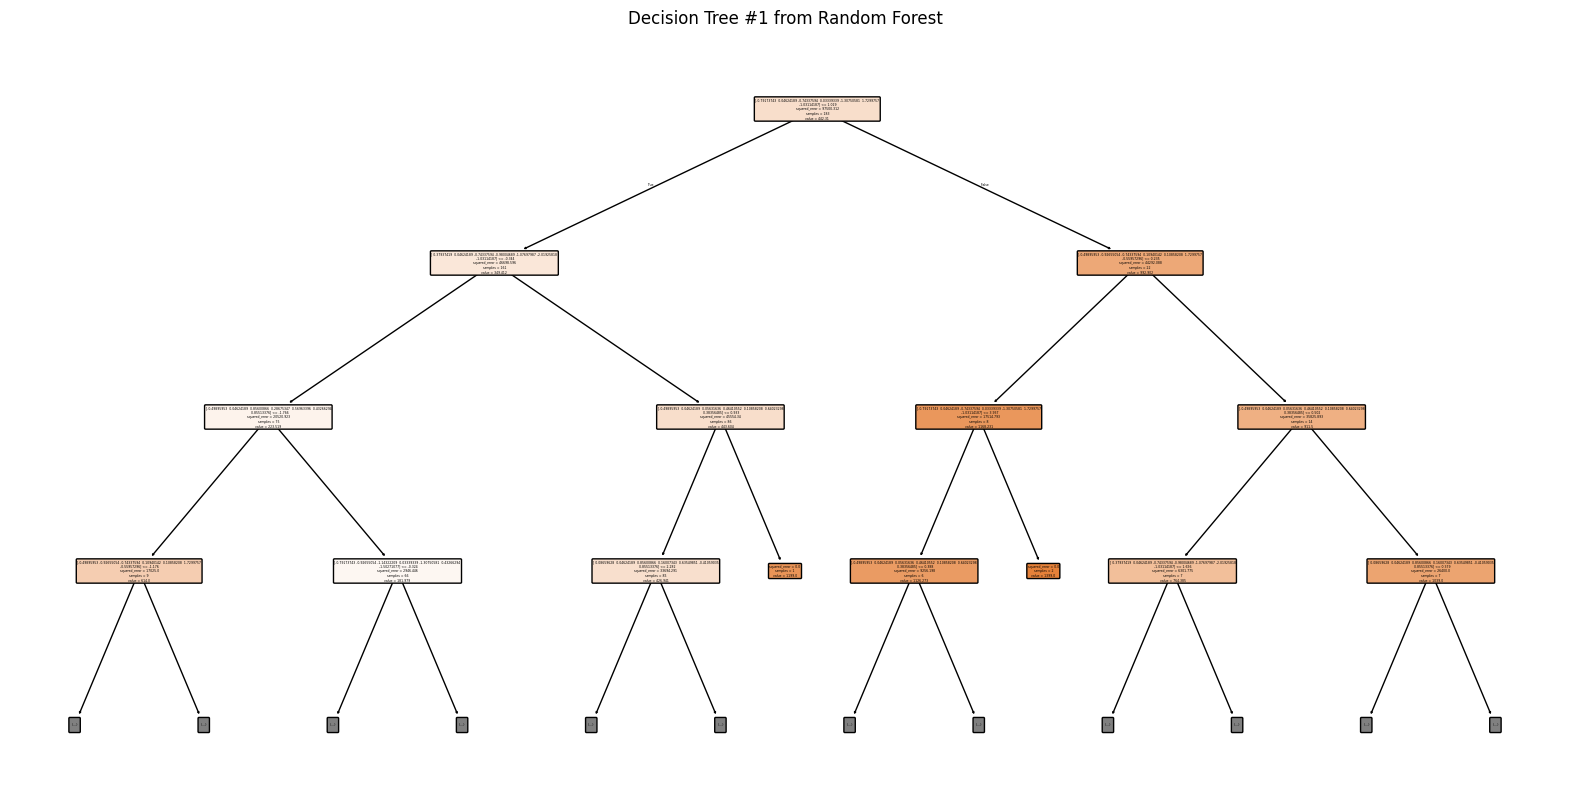

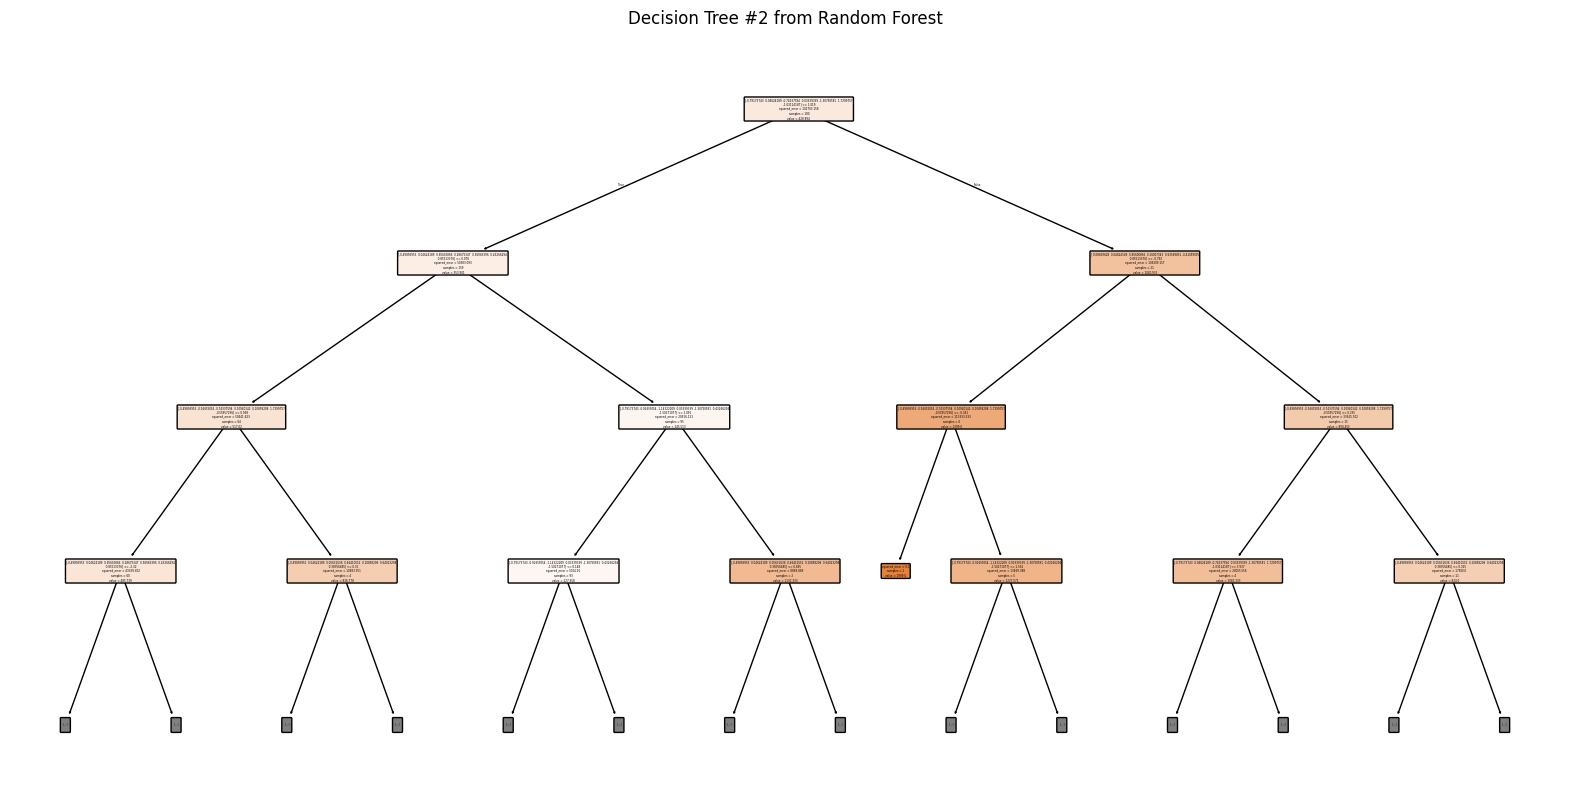

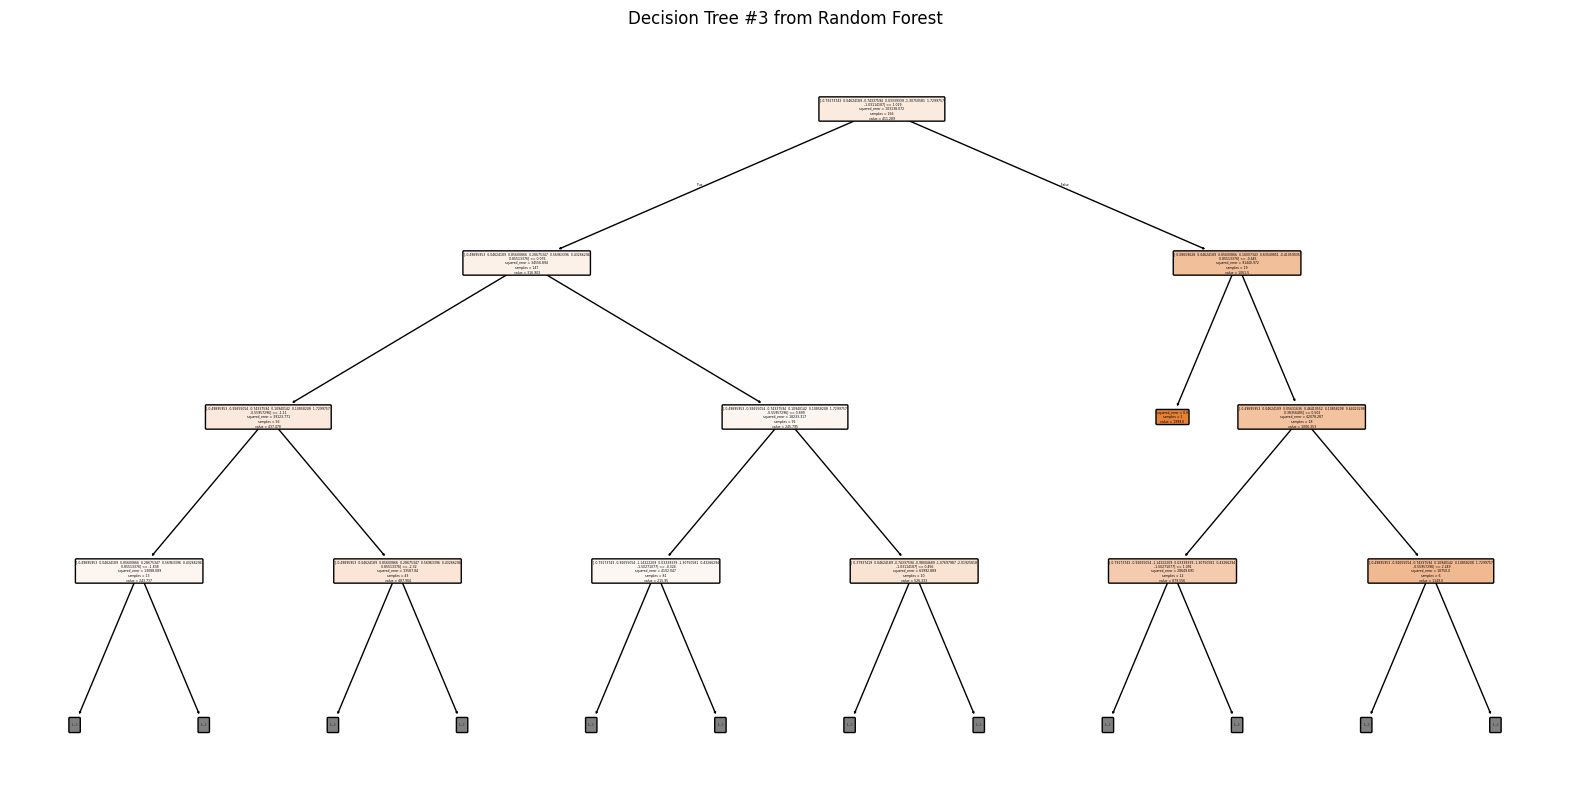

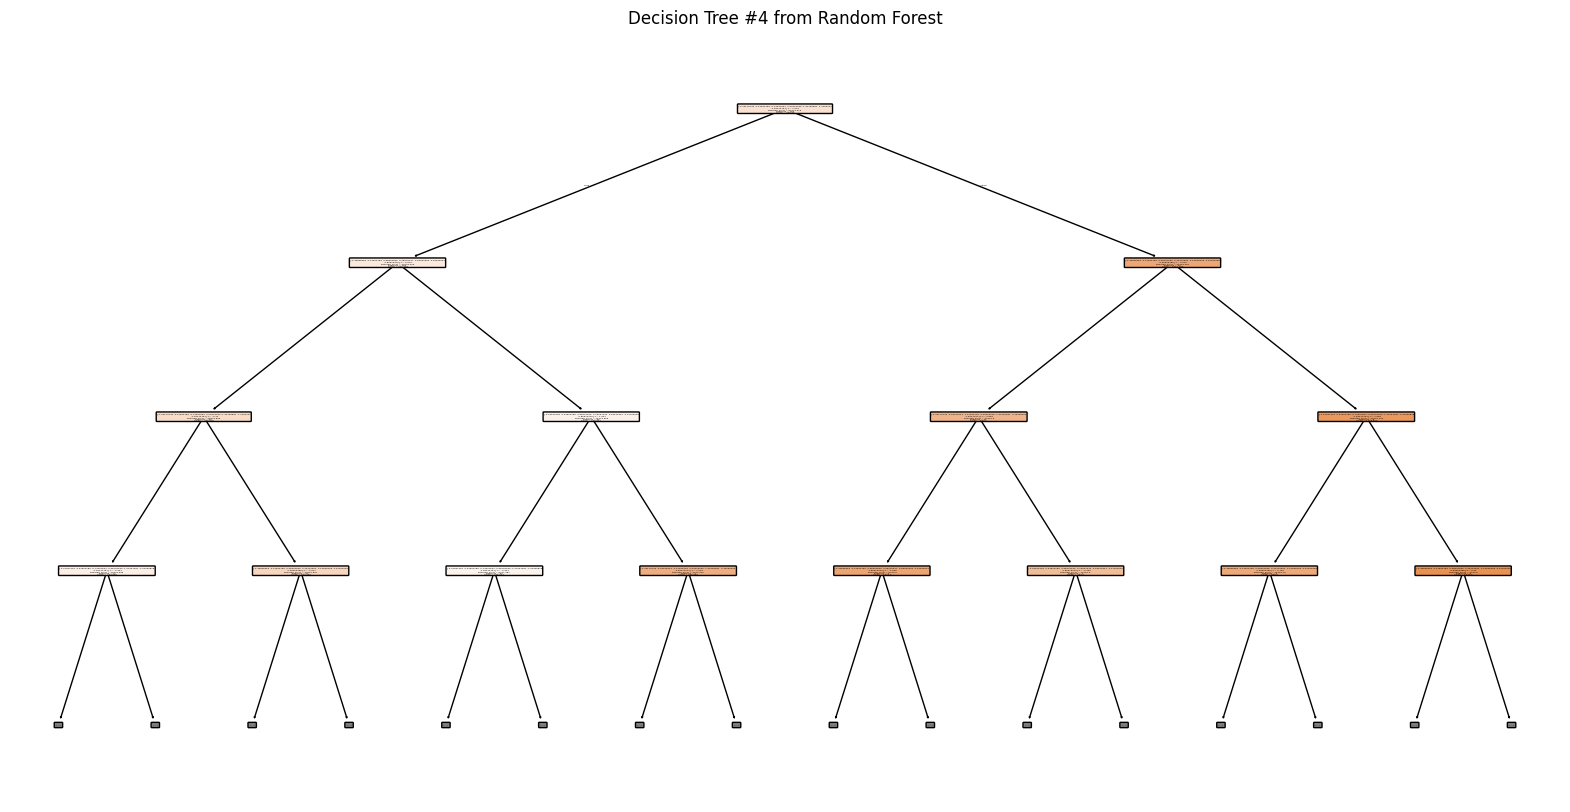

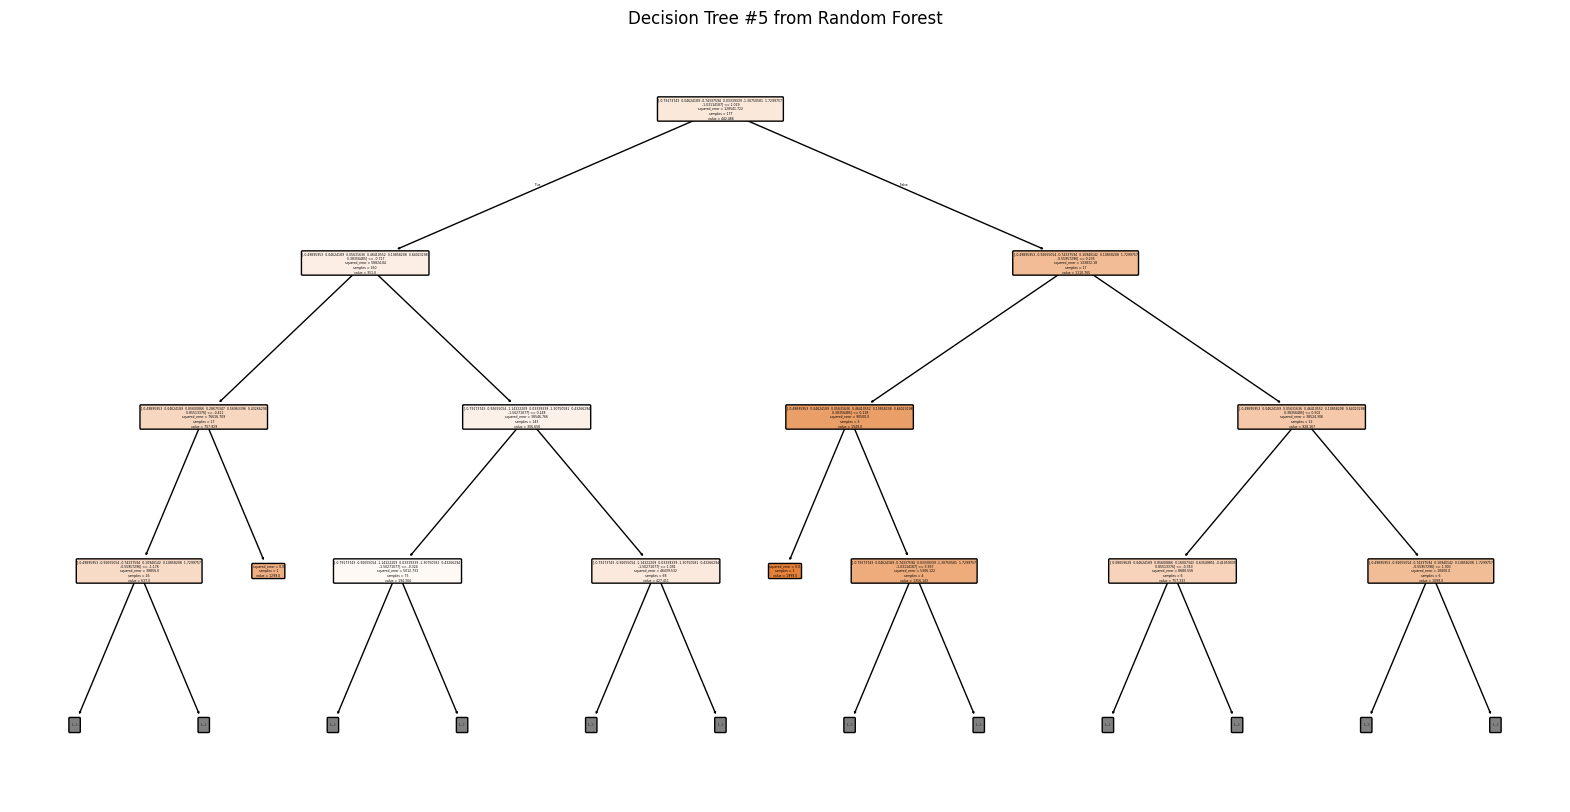

In [218]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for i in range(5):
    plt.figure(figsize=(20, 10))
    plot_tree(
        forest.estimators_[i],
        feature_names=X_train_s,
        filled=True,
        rounded=True,
        max_depth=3
    )
    plt.title(f"Decision Tree #{i+1} from Random Forest")
    plt.show()


In [219]:
forest.score(X_test_s, y_test)

0.8456938903716743

In [220]:
train_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Build_Quality
294,4,128,8,6.55,76.0,4350,449,6
35,1,128,4,6.50,17.0,6000,159,2
74,5,128,4,6.10,24.0,3110,599,2
246,2,128,6,6.67,60.0,5160,249,5
263,2,64,4,6.53,60.0,6000,169,3
...,...,...,...,...,...,...,...,...
277,4,64,4,6.22,15.0,4230,139,0
305,5,128,6,6.10,36.0,2815,799,3
255,3,128,8,6.44,58.0,4100,319,6
320,4,128,8,6.43,60.0,4310,399,6


In [221]:
test_data

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Build_Quality
102,0,128,8,6.70,24.0,3300,999,5
142,4,128,6,6.43,52.0,5000,299,5
354,8,128,8,6.44,63.0,4115,449,6
190,3,128,8,6.44,74.0,4000,399,6
273,1,32,2,6.50,15.0,5000,99,1
...,...,...,...,...,...,...,...,...
72,4,128,8,6.43,60.0,4310,329,6
125,0,128,6,6.40,60.0,6000,229,5
170,6,128,5,6.80,61.0,5000,399,5
377,0,128,6,6.50,32.0,4500,699,4


In [222]:

test_row = pd.DataFrame([{
    'Brand': 5,
    'Storage': 256,
    'RAM': 12,
    'Screen Size (inches)': 6.78,
    'Camera (MP)': 108 + 12 + 12 + 12,
    'Battery Capacity (mAh)': 4500,
    'Build_Quality': 9
}])



In [223]:

test_scaled = scaler.transform(test_row)

prediksi = forest.predict(test_scaled)
print("Prediksi harga: $", round(prediksi[0], 2))

Prediksi harga: $ 1110.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
